$$
\text{Stushi Das - Pset 2}
$$

### Q1 - Asking Questions

### What are some compelling questions that you can ask with the dataset you collected?

**Q1 - Is there some correlation between the sentiments of a post and the sentiments of the replies for that post.**

Rationale : This can help us deduce how the users responds to the different sentiments of the news posts and also if the sentiments of the post have any bearings on the sentiments of users' replies. I think this would be interesting because social media websites can possibly predict by the post content whether the replies could get problematic or toxic. This can help them to take some actions like limiting comments on that post to help keep their platforms safe.


**Q2 - Is there a difference in the sentiment of users who reply on Washington Post's posts and NY Times' posts?** 


Rationale: This can help us in understanding if there is any bias present - both on the accounts' perspective and the users' perspective. This might also reveal whether users trust a particular source of information more than the other and so might be useful in the study of misinformation on Bluesky. And this may also be helpful to see if posts of certain ideologies are more prevalent on one of the two accounts and so the users' replies change accordingly.

In [1]:
#importing all relevant libraries
import pandas as pd
import numpy as np
import sklearn
import re
import nltk, json, io
#nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize, WordPunctTokenizer
#nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#!pip install TextBlob
from textblob import TextBlob
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
#importing the data
df = pd.read_csv("/Users/dstushi/Downloads/bsky_replies.csv")
df.head()

,AccountName,PostID,PostText,PostCreationTime,PostLikes,PostRepost,ReplyID,ReplyCreationTime,ReplyText,ReplyLike,ReplyRepost
0,The Washington Post,at://did:plc:k5nskatzhyxersjilvtnz4lh/app.bsky...,Exclusive: The Biden administration is working...,2024-01-27T18:32:48.577Z,64,12,at://did:plc:5re3aeyucqzhi77ydlo63745/app.bsky...,2024-01-27T18:49:51.312Z,Ukraine must be supported at all costs. Our fr...,4,0
1,The Washington Post,at://did:plc:k5nskatzhyxersjilvtnz4lh/app.bsky...,Exclusive: The Biden administration is working...,2024-01-27T18:32:48.577Z,64,12,at://did:plc:gl53bo6xdwyxxrtmshtog3dk/app.bsky...,2024-01-27T19:23:53.120Z,"к сожеалению вы уже и не великая страна ,вы по...",0,0
2,The Washington Post,at://did:plc:k5nskatzhyxersjilvtnz4lh/app.bsky...,Exclusive: The Biden administration is working...,2024-01-27T18:32:48.577Z,64,12,at://did:plc:wxiy5upleankpf7xyo3qa26q/app.bsky...,2024-01-28T00:13:59.710Z,Supporting Kiev = Supporting Nazism,0,0
3,The Washington Post,at://did:plc:k5nskatzhyxersjilvtnz4lh/app.bsky...,Breaking news: Donald Trump is ordered to pay ...,2024-01-26T21:49:40.663Z,450,74,at://did:plc:72ibcdq3wu4tvmkau4rmeih7/app.bsky...,2024-01-26T21:50:59.113Z,Anyone know if she will get this money? Hope so.,6,0
4,The Washington Post,at://did:plc:k5nskatzhyxersjilvtnz4lh/app.bsky...,Breaking news: Donald Trump is ordered to pay ...,2024-01-26T21:49:40.663Z,450,74,at://did:plc:6im54m7hlpjfynulw5sbeywc/app.bsky...,2024-01-26T21:51:18.784Z,Me right now.,3,0


### Q2 - Inspect and Data Cleaning

### 2a) Inspect: Write code to inspect the data. What do you observe? Along with the code, write your observations in the markdown cell.

In [3]:
#checking the summary of our df
df.describe()

,PostLikes,PostRepost,ReplyLike,ReplyRepost
count,2045.000000,2045.000000,2045.000000,2045.000000
mean,154.160391,42.038142,3.151589,0.121760
std,224.138876,62.913777,7.185310,0.908936
min,6.000000,0.000000,0.000000,0.000000
25%,34.000000,9.000000,0.000000,0.000000
50%,64.000000,16.000000,1.000000,0.000000
75%,140.000000,37.000000,3.000000,0.000000
max,1094.000000,250.000000,114.000000,29.000000


In [4]:
#checking the  count of our data 
df.shape

(2045, 11)

In [5]:
#checking for any null values in our df
df.isnull().sum()

AccountName           0
PostID                0
PostText              0
PostCreationTime      0
PostLikes             0
PostRepost            0
ReplyID               0
ReplyCreationTime     0
ReplyText            38
ReplyLike             0
ReplyRepost           0
dtype: int64

In [6]:
#checking the length of unique postsIDs
len(df['PostID'].unique())

196

In [7]:
#checking the length of unique ReplyIds
len(df['ReplyID'].unique())

2045

In [8]:
#checking if AccountName column is clean
df['AccountName'].unique()

array(['The Washington Post', 'Dan Diamond', 'Post Sports ',
       'The New York Times', 'Karen Yourish', 'Charlie Savage'],
      dtype=object)

In [9]:
#checking the head of reply text column to check the kind of strings we have
df.ReplyText.value_counts().head(2)

ReplyText
#primaries #trump #maga #gop #tuckfrump #puckfutin\n#aiart #LifeOnMars #dalle3 #RealLifeOnMars #dada #reallifeonmarswithoutelonandjeff #forallmankind #fuckbergerzuck \n#russiatoday #rt #puckfutin\n#putin #russia #russianinvasion \nПутин - военный преступник\n#СЛАВАУКРАЇНІ #ukraine .    3
Who?                                                                                                                                                                                                                                                                                           3
Name: count, dtype: int64

In [10]:
#similarly checking the head of post text column to check the kind of strings we have
df.PostText.value_counts().head(2)

PostText
Republican polling leader Donald Trump on Tuesday threatened unrest if the criminal charges against him cause him to lose the 2024 election. The former president did not take questions and walked away as a Washington Post reporter asked him to rule out violence by his supporters.    85
Breaking news: Rudy Giuliani must pay two Georgia poll workers who sued him for defamation $148 million after he falsely accused them of helping to steal the 2020 presidential election from Donald Trump.                                                                                 59
Name: count, dtype: int64

### 2a)Observations:
- **From the above Inspections we can see that our data size is 2045x11. And we have 196 uniques Post Ids and 2045 unique Reply IDs. What's interesting to see here is that we've 38 null values in the Reply Texts but their replyId is present. It might be possible that the user would have deleted their comments later and we're only left with those reply Ids and no text. I'll delete the rows with NULL reply text in my cleaning phase as they won't help us with our analysis.**  

- **Another thing to note here is that we have many hashtags as well as numerical values in our post texts as well as reply text. We'll have to remove them in the cleaning phase to make the analysis better.**   

- **Also, we have some additinal account data such as 'Dan Diamond', 'Post Sports ', etc. we'll have to remove them as well in the cleaning phase so that we don't add any noise in our analysis.**

### 2b) Clean: Write code to clean the data. Along with the code, you need to write the rationale behind the cleaning process, i.e., what are you observing after the first level of cleaning, what is still messy and needs additional cleaning, how are you deciding to do it, etc. At this stage, your cleaning should at least comprise: (1) common data cleaning steps, and (2) dealing with messy Youtube/Bluesky data.

**Dropping the rows with null values**

In [11]:
#dropping the rows with null values
df = df.dropna()

**Dropping the row with different account name than The Washington Post and The New York Times**

In [12]:
#since we had additinal account names, creating a list of unwanted accounts to be droppped
unwanted_accounts = ["Dan Diamond", "Charlie Savage", "Post Sports ", "Karen Yourish"]

#dropping rows with unwanted AccountName values
df = df.drop(df[df['AccountName'].isin(unwanted_accounts)].index)

#checking if data is now clean
df['AccountName'].unique()

array(['The Washington Post', 'The New York Times'], dtype=object)

In [13]:
#checking the final count of our data 
df.shape

(1967, 11)

**Removing the Urls from both ReplyText and PostText**

In [14]:
#to check if the urls is being removed from out function
print(df["ReplyText"][56])

Maybe you shouldn't have built your entire political identity around simping Trump then 🤷‍♂️

www.youtube.com/watch?v=z1YP...


In [15]:
#making a function to replace the urls present in the string with "" 
#(Reference: https://www.geeksforgeeks.org/remove-urls-from-string-in-python/)
def remove_urls_search(text, replacement_text=""):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|(\S+\.com\S*)')
 
    while True:
        match = url_pattern.search(text)
        if not match:
            break
        text = text[:match.start()] + replacement_text + text[match.end():]
 
    return text

In [16]:
#applying the function to the ReplyText column
df["ReplyText"] = df["ReplyText"].apply(remove_urls_search)

In [17]:
#printing to check if url has been removed
print(df["ReplyText"][56])

Maybe you shouldn't have built your entire political identity around simping Trump then 🤷‍♂️




In [18]:
#applying the same function to PostText as well now to remove URLs from that column
df["PostText"] = df["PostText"].apply(remove_urls_search)

**Removing Punctuations and Special characters from ReplyText and Post Text**

In [19]:
#example to check if the punct and spec character are being removed from out function
print(df["ReplyText"][56])

Maybe you shouldn't have built your entire political identity around simping Trump then 🤷‍♂️




In [20]:
#using regex to remove punct and special character from both ReplyText and PostText
# Reference : https://www.geeksforgeeks.org/python-remove-punctuation-from-string/
df.PostText = df.PostText.replace('[^\w\s+]', '', regex=True)
df.ReplyText = df.ReplyText.replace('[^\w\s+]', '', regex=True)
#printing to check if special characters have been removed
print(df["ReplyText"][56])

Maybe you shouldnt have built your entire political identity around simping Trump then 




**Removing Numeric Digits from ReplyText and PostText**

In [21]:
#example to check if the numeric digits are being removed from out function
print(df["ReplyText"][88])

So the input from the 49 other states doesnt matter
Stop the count early


In [22]:
#using regex to remove numeric digits from both ReplyText and PostText
# Reference : https://www.geeksforgeeks.org/python-ways-to-remove-numeric-digits-from-given-string/
df.PostText = df.PostText.replace('\d', '', regex=True)
df.ReplyText = df.ReplyText.replace('\d', '', regex=True)
#printing to check if numeric digits have been removed
print(df["ReplyText"][88])

So the input from the  other states doesnt matter
Stop the count early


**Making everything lowercase now** 

In [23]:
#Finally making everything lowercase
df.PostText = df.PostText.str.lower()
df.ReplyText = df.ReplyText.str.lower()
#checking the example to see if everything is finnaly lowercase or not
print(df["ReplyText"][88])

so the input from the  other states doesnt matter
stop the count early


**Removing the stopwords from ReplyText and PostText**

In [24]:
#reusing the code from lab to remove the stopwords
#getting all the stopwords
stopeng = set(stopwords.words('english'))
def remove_stops(row):
    words = row.split()  
    filter_words = [x for x in words if x not in stopeng]
    return ' '.join(filter_words)
#applyting the function to both ReplyText and PostText
df["ReplyText"] = df["ReplyText"].apply(remove_stops)
df["PostText"] = df["PostText"].apply(remove_stops)

In [25]:
#printing the ReplyText example to check if stop words have been removed
print(df["ReplyText"][88])

input states doesnt matter stop count early


### 2b) Rationale:
- **I've dropped the rows with null values as well as the rows with different AccountName to remove noise from our data for analysis**
- **We can also see from the examples above that urls have been removed as it is of no use for sentiment Analysis**
- **I've also removed all the punctuations, special characters as well as the numeric digits as it would have also not served any purpose for sentiment analysis**
- **I've also changed the whole string to lowercase as it would help us later with sentiment analysis by matching the token that we'll later create with different dictionaries**
- **I've finally removed the stop words from the whole ReplyText and PostText as well as they won't help us predicting the sentiments of the text**

### 2c) Tokenize: Write code to tokenize your entire dataset. Use at least three different types of tokenizers. Display results from all the tokenizers in a pandas dataframe so that you can visually compare them.

**Creating DFs for storing tokens for both ReplyText and PostText**

In [26]:
#creating the dfs where we'll store the tokens
dfreplyTokenization = pd.DataFrame()
dfpostTokenization = pd.DataFrame()

**Using three different tokenizers to check which would be the best on both ReplyText and PostText and storing their values in their respective DFs. The three tokenizers that I used are :**
- word_tokenize
- WordPunctTokenizer, and
- sent_tokenize

In [27]:
#using the tokenizers and adding them to the new dfreplyTokenization to store all the ReplyText tokens 
dfreplyTokenization['Reply Text Tokens(word_tokenize)'] = df.ReplyText.apply(word_tokenize)
dfreplyTokenization['Reply Text Tokens(wordPunct_tokenize)'] = df.ReplyText.apply(WordPunctTokenizer().tokenize)
dfreplyTokenization['Reply Text Tokens(sent_tokenize)'] = df.ReplyText.apply(sent_tokenize)

In [28]:
#using the tokenizers and adding them to the new dfpostTokenization to store all the PostText tokens 
dfpostTokenization['Post Text Tokens(word_tokenize)'] = df.PostText.apply(word_tokenize)
dfpostTokenization['Post Text Tokens(wordPunct_tokenize)'] = df.PostText.apply(WordPunctTokenizer().tokenize)
dfpostTokenization['Post Text Tokens(sent_tokenize)'] = df.PostText.apply(sent_tokenize)

**Checking 5 sample rows for both the dfs**

In [29]:
#checking 5 sample of the ReplyText tokens
dfreplyTokenization.sample(5)

,Reply Text Tokens(word_tokenize),Reply Text Tokens(wordPunct_tokenize),Reply Text Tokens(sent_tokenize)
57,"[hes, trying, play, sides, fascism, fence, lol]","[hes, trying, play, sides, fascism, fence, lol]",[hes trying play sides fascism fence lol]
389,"[didnt, pardon, mob, thugs, power, would, stic...","[didnt, pardon, mob, thugs, power, would, stic...",[didnt pardon mob thugs power would stick neck...
971,"[literally, dems, like, broke, law, held, acco...","[literally, dems, like, broke, law, held, acco...",[literally dems like broke law held accountabl...
66,"[whats, vow, gop, primary, candidate, worth]","[whats, vow, gop, primary, candidate, worth]",[whats vow gop primary candidate worth]
582,"[probably, longer, keep, clean, depends, durat...","[probably, longer, keep, clean, depends, durat...",[probably longer keep clean depends duration d...


In [30]:
#checking 5 sample of the PostText tokens
dfpostTokenization.sample(5)

,Post Text Tokens(word_tokenize),Post Text Tokens(wordPunct_tokenize),Post Text Tokens(sent_tokenize)
677,"[breaking, news, maine, barred, donald, trump,...","[breaking, news, maine, barred, donald, trump,...",[breaking news maine barred donald trump prima...
1001,"[republicans, signed, officiallooking, paperwo...","[republicans, signed, officiallooking, paperwo...",[republicans signed officiallooking paperwork ...
1519,"[asa, hutchinson, former, governor, arkansas, ...","[asa, hutchinson, former, governor, arkansas, ...",[asa hutchinson former governor arkansas enter...
1089,"[washington, post, review, trumps, clemency, o...","[washington, post, review, trumps, clemency, o...",[washington post review trumps clemency orders...
1125,"[house, voted, expel, rep, george, santos, rny...","[house, voted, expel, rep, george, santos, rny...",[house voted expel rep george santos rny range...


**Checking avg len of tokens for each method for both the dfs**

In [31]:
#checking the avg len of tokens for each method for Reply tokenization DF
print("wordPunct:",dfreplyTokenization['Reply Text Tokens(wordPunct_tokenize)'].apply(len).mean())
print("word:",dfreplyTokenization['Reply Text Tokens(word_tokenize)'].apply(len).mean())
print("sent:",dfreplyTokenization['Reply Text Tokens(sent_tokenize)'].apply(len).mean())

wordPunct: 8.785460091509913
word: 8.796644636502288
sent: 0.9796644636502287


In [32]:
#similarly, checking the avg len of tokens for each method for Post tokenization DF
print("wordPunct:",dfpostTokenization['Post Text Tokens(wordPunct_tokenize)'].apply(len).mean())
print("word:",dfpostTokenization['Post Text Tokens(word_tokenize)'].apply(len).mean())
print("sent:",dfpostTokenization['Post Text Tokens(sent_tokenize)'].apply(len).mean())

wordPunct: 22.956786985256738
word: 22.9598373157092
sent: 1.0


**From above we can see that avg lenth is different for wordPunct and word tokenizers, so i'm checking what all rows have different length of tokens for word punct and word tokenizers for both Posttext and ReplyText tokens**

In [33]:
#checking the indices where number of tokens are different for workPunct and word tokenizers
#Reference : https://www.geeksforgeeks.org/pandas-dataframe-iterrows/
for i, row in dfpostTokenization.iterrows():
    if len(row[0]) != len(row[1]):
        print("Row", i)

Row 395
Row 396
Row 397
Row 398
Row 399
Row 400


In [34]:
#checking the indices where number of tokens are different for workPunct and word tokenizers
#Reference : https://www.geeksforgeeks.org/pandas-dataframe-iterrows/
for i, row in dfreplyTokenization.iterrows():
    if len(row[0]) != len(row[1]):
        print("Row", i)

Row 12
Row 32
Row 126
Row 140
Row 173
Row 248
Row 377
Row 510
Row 580
Row 627
Row 765
Row 948
Row 979
Row 1152
Row 1173
Row 1301
Row 1420
Row 1480
Row 1544
Row 1662
Row 1711
Row 1728
Row 1767
Row 1769


**Checking what are the differences in wordPunct and word tokenizers tokens with a few examples that i'm taking from the indices that I fetched above**

In [35]:
#checking the differences between tokens from the indices that we got above
pd.set_option('display.max_colwidth', 1000)
dfreplyTokenization.iloc[243,:]

Reply Text Tokens(word_tokenize)         [gon, na, blow, hunters, chance, reelection]
Reply Text Tokens(wordPunct_tokenize)      [gonna, blow, hunters, chance, reelection]
Reply Text Tokens(sent_tokenize)               [gonna blow hunters chance reelection]
Name: 248, dtype: object

In [36]:
#checking the differences between tokens from the indices that we got above
pd.set_option('display.max_colwidth', 1000)
dfreplyTokenization.iloc[729,:]

Reply Text Tokens(word_tokenize)         [can, not, jump, federal, appeals, courts, go, directly, supreme, court, stupid, move, jack, maybe, filed, case, much, sooner]
Reply Text Tokens(wordPunct_tokenize)      [cannot, jump, federal, appeals, courts, go, directly, supreme, court, stupid, move, jack, maybe, filed, case, much, sooner]
Reply Text Tokens(sent_tokenize)                           [cannot jump federal appeals courts go directly supreme court stupid move jack maybe filed case much sooner]
Name: 765, dtype: object

In [37]:
#checking the differences between tokens from the indices that we got above
pd.set_option('display.max_colwidth', 1000)
dfreplyTokenization.iloc[907,:]

Reply Text Tokens(word_tokenize)         [israel, hurry, got, ta, kill, us, let, help]
Reply Text Tokens(wordPunct_tokenize)      [israel, hurry, gotta, kill, us, let, help]
Reply Text Tokens(sent_tokenize)                 [israel hurry gotta kill us let help]
Name: 948, dtype: object

**From the above examples we can see that word tokenizer is making two tokens for words like cannot(can and not), gonna(gon and na) and gotta(got and ta) which will eventually change the meaning of words and is making some meaningless tokens as well such as 'ta'. Whereas WordPunct tokenizer is keeping them as is. Also with sentence tokenizer, we're getting only 1 token of the entire text as we've removed all the punctuations so that will hinder the performence of our sentiment analysis.** 

### Based on the above, I believe that WordPunct tokenizer will work best for us in this case as it is keeping the meaning of words like cannot, gonna and gotta intact as it is compared to word tokenizer. Also with no punctuations, sentance tokenizers will not be able to perform bettern with sentiment analysis but with WordPunct, we can analyse the sentiments of each word token seperately.

### Q3 - Analyze Data for Sentiment

### 3a) Sentiment analysis: Pick at least three different ways of conducting sentiment analysis. Write code to loop through your data and find sentiment for each comment, using each of these methods. Report your observations: What do you observe? Are there any similarities or differences across the methods? In the next question, we will quantify these comparisons.

**I tried doing the sentiment analysis of my tokens but the results were not accurate. Upon reseasrching more about it I found out that lemmatization can help with the accuracy.So, we'll do lemmatization of the tokens to bring the tokens to their base or root words as sentiment analysis will be more accurate after that**

In [38]:
#making a new df to store the best RepltText Tokens
BestToken = pd.DataFrame()

In [39]:
#storing the wordPunct Tokens for ResplyText
BestToken['Reply Text Tokens'] = dfreplyTokenization['Reply Text Tokens(wordPunct_tokenize)']

In [40]:
#taking an example to check it later after lemmatization
BestToken['Reply Text Tokens'][50]

['warning',
 'thing',
 'wanting',
 'telling',
 'everyone',
 'going',
 'last',
 'three',
 'years',
 'warning',
 'danger']

In [41]:
#using spacy lemmatizer to lemmatize my tokens 
#Reference: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
nlp = spacy.load('en_core_web_sm') 
def token_lemmatization(row):
    doc = nlp(' '.join(row))
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

BestToken['Reply Text Tokens'] = BestToken['Reply Text Tokens'].apply(token_lemmatization)

In [42]:
#checking if lemmatization worked
BestToken['Reply Text Tokens'][50]

['warn',
 'thing',
 'want',
 'tell',
 'everyone',
 'go',
 'last',
 'three',
 'year',
 'warn',
 'danger']

### Now for sentiment analysis, i'll take opinion lexicon, text_blob and vader

**1st: Opinion lexicon**

If postive lex > negative lex then positive  

If negative lex > positive lex then positive  

If both equal then neutral

In [43]:
#creating a function to check if ReplyText is positive, negative or neutral using opinion_lexicon corpus
def opinion_lex(token):
    pos = 0
    neg = 0
    for lex in [token]:
        for word in lex:
            if word in opinion_lexicon.positive():
                pos = +1
            elif word in opinion_lexicon.negative():
                neg = +1
            else:
                continue
    if pos > neg :
        return 1
    elif neg > pos :
        return -1
    else:
        return 0          

In [44]:
#applying the above function to Reply Text Tokens
BestToken['Opinion Lexicon'] = BestToken['Reply Text Tokens'].apply(opinion_lex)

In [45]:
#checking the value counts of each sentiment
BestToken['Opinion Lexicon'].value_counts() 

Opinion Lexicon
 0    1067
-1     526
 1     374
Name: count, dtype: int64

**2nd: Vader**

Positive sentiment: compound score >= 0.05  

Neutral sentiment: -0.05 < compound score < 0.05   

Negative sentiment: compound score <= -0.05

In [46]:
#creating a function to check if ReplyText is positive, negative or neutral using VADER
analyzer = SentimentIntensityAnalyzer()
def vader_score(token):
    text = ' '.join(token)
    x = analyzer.polarity_scores(text)
    if x['compound'] >= 0.05:
        return 1
    elif x['compound'] <= -0.05:
        return -1
    else:
        return 0   

In [47]:
#applying the above function to Reply Text Tokens
BestToken['Vader'] = BestToken['Reply Text Tokens'].apply(vader_score)

In [48]:
#checking the value counts of each sentiment
BestToken['Vader'].value_counts() 

Vader
-1    765
 1    655
 0    547
Name: count, dtype: int64

**3rd: Text_Blob**

Positive sentiment: polarity score > 0  

Neutral sentiment: polarity score = 0

Negative sentiment: polarity score < 0

In [49]:
#creating a function to check if ReplyText is positive, negative or neutral using TextBlob
def textblob_score(token):
    text = ' '.join(token)
    blob = TextBlob(text)
    if blob.polarity > 0:
        return 1
    elif blob.polarity < 0:
        return -1
    else:
        return 0 

In [50]:
#applying the above function to Reply Text Tokens
BestToken['TextBlob'] = BestToken['Reply Text Tokens'].apply(textblob_score)

In [51]:
#checking the value counts of each sentiment
BestToken['TextBlob'].value_counts() 

TextBlob
 0    813
 1    634
-1    520
Name: count, dtype: int64

In [52]:
#checking 10 sample to see the results of our sentiment analysis
BestToken.sample(10)

,Reply Text Tokens,Opinion Lexicon,Vader,TextBlob
1981,"[much, hate, need, europe]",-1,-1,-1
2041,"[nothing, much, decide, constitution, forbid, anyone, engage, insurrection, hold, public, office, remains, see, whether, originalist, convenient, faction, scotus, decide, circumvent, constitution]",0,0,1
1590,"[nice, see, feel, confident, enough, fully, display, neck, vag]",1,1,1
954,"[come, increase, minimum, wage, parliamentarian, allpowerful, filibuster, allpowerful, come, voting, right, pay, family, leave, child, tax, credit, voting, right, sudden, biden, power, bypass, congress]",1,1,1
1488,"[mean, boost, putin, defy, biden]",0,1,-1
1763,"[even, plan]",0,0,0
789,"[heart, fire, heart]",0,1,0
648,"[gulf, states, control, fascist, expect, president, biden, come, bullshit, wow, fox, washington, post, begin]",0,-1,1
240,"[less, trial, guy, run, president, hunter, be, not, ballot]",0,0,-1
422,"[maybe, could, elemental, factcheck, assumptionsyour, constant, inflationinflationinflation, economic, reporting, drumbeat, outdated, year]",0,0,-1


**We can see from above that there are some similarities with the neutral sentiments but the rest of them varies across the three types of analysis**

In [53]:
#checking the value counts for comparision between the three methods
print(BestToken['Opinion Lexicon'].value_counts()) 
print(BestToken['Vader'].value_counts()) 
print(BestToken['TextBlob'].value_counts()) 

Opinion Lexicon
 0    1067
-1     526
 1     374
Name: count, dtype: int64
Vader
-1    765
 1    655
 0    547
Name: count, dtype: int64
TextBlob
 0    813
 1    634
-1    520
Name: count, dtype: int64


**We can also see that Opinion Lexicon and TextBlob has mostly identified the Text Tokens as neutral whereas Vader identified most Reply Text Tokens as negative**

### 3b) Quantitatively comparing methods: Is there a way to do a pairwise comparison of the methods that you picked? You need to report at least one pairwise comparison between the methods. Better if you are able to report all pairwise comparisons across all methods. In your pairwise comparison, compute a quantitative measure to show what proportion of comments match or do not match between two measures. You can also include the rationale behind the choice of your measure.

In [54]:
#comparison between two sentiments one by one
lexicon_vader = (BestToken['Opinion Lexicon'] == BestToken['Vader']).mean()
lexicon_textblob = (BestToken['Opinion Lexicon'] == BestToken['TextBlob']).mean()
vader_textblob = (BestToken['Vader'] == BestToken['TextBlob']).mean()

#printing the results
print("Opinion Lexicon vs. VADER:", lexicon_vader*100,"%")
print("Opinion Lexicon vs. TextBlob:", lexicon_textblob*100,"%")
print("VADER vs. TextBlob", vader_textblob*100,"%")

Opinion Lexicon vs. VADER: 51.60142348754449 %
Opinion Lexicon vs. TextBlob: 48.093543467208946 %
VADER vs. TextBlob 57.70208439247585 %


**I've checked the percentage of similarity between two pairs one by one. This can tell how many times the two different kind of sentiment analysis agrees with each other**   

**Vader and TextBlob Seems to be the similar to each other with 57.7% similarity percentage whereas Lexicon and Textblob seems to be the least similar with ~48.1%**

### 3c) Qualitative + Quantitative comparison: Write code to randomly pick 40 comments. By hand, mark each of their sentiments. Now pick two sentiment analysis methods of your choice to automatically find the sentiments of these 40 tweets. Considering your hand labels as the absolute ground truth, write code to determine which sentiment analysis method works better. It might be that both methods you picked do equally well. Provide a rationale for your response in a markdown cell.

In [55]:
#creating a sample40df to include 40 random samples
#sample40df = pd.DataFrame()
#sample40df = BestToken.sample(40)

In [56]:
#setting a new column where I'll manually input the sentiments
#sample40df['Manual'] = None

In [57]:
#saving sample40df as csv so that i can manually input the sentiments based on my understanding
#sample40df.to_csv('sample.csv', index=False)

In [58]:
#reading the csv to a new df sampleDf and printing its head
sampleDf = pd.read_csv("/Users/dstushi/Downloads/sample - sample.csv")
sampleDf.head()

,Reply Text Tokens,Opinion Lexicon,Vader,TextBlob,Manual
0,"['good', 'justice', 'system', 'explain', 'victim', 'get', 'let', 'hear', 'student', 'heckle', 'kyle', 'duncan', 'violation', 'civil', 'right']",0,1,1,0
1,"['rapist', 'lose', 'every', 'court', 'case', 'he', 's', 'pick', 'real', 'winner', 'cult', 'leader', 'republicans']",0,-1,1,-1
2,"['carter', 'sell', 'peanut', 'farm']",0,0,0,0
3,"['justice', 'we', 'much', 'correct', 'brazil', 'even', 'though', 'think', 'otherwise']",1,1,1,1
4,"['historic', 'thing', 'america']",0,0,0,1


In [59]:
#comparing two sentiment analysis method in a similar way i computed the similarity earlier
TextBlob_manual = (sampleDf['TextBlob'] == sampleDf['Manual']).mean()
vader_manual = (sampleDf['Vader'] == sampleDf['Manual']).mean()
#printing the results
print("TextBlob vs Manual:",TextBlob_manual*100,"%")
print("Vader vs Manual:",vader_manual*100,"%")

TextBlob vs Manual: 45.0 %
Vader vs Manual: 60.0 %


**I've selected Text blob and vader as their comparision amongst themselves came out to be the maximum. Which means they were more accurate than Opinion Lexicon to determine the sentiments of ReplyText Tokens.**  

**Amonst these two we can see that Vader was the most similar to our manual inputs of sentiments and therefore Vader was more able to perform sentiment analysis of our ReplyText Token**

### Q4) Analyze Data with LIWC : Pick at least three dimensions from LIWC that you would want to investigate on your data. Write code to find what proportion of each of the two dimensions you picked are present in your data. Motivate your choice of dimension with a research question. For example, if you are curious to know the prevalence of angry comments, you can pick the “angry” dimension in LIWC. Another neat trick here would be to make your code modular via Python functions so that later you can reuse this function for computing across multiple dimensions.

**For this I created a structured csv from the dictionary given to us, since the dictionary given to us was unstructured**

In [60]:
#reading the csv to a new df called liwcdict
liwcdict = pd.read_csv("/Users/dstushi/Downloads/LIWC2015 dictionary poster.csv")

In [61]:
#printing the head of liwcdict df
liwcdict.head()

,Function,Pronoun,Ppron,I,We,You,SheHe,They,Ipron,Article,...,Home,Money,Relig,Death,Informal,Swear,Netspeak,Assent,Nonflu,Filler
0,a,another,he,i,let's,ily*,he,their*,another,a,...,address,account*,afterlife*,alive,(:,af,(:,absolutely,ah,anyway*
1,about,anybod*,he'd,i'd,lets,thee,he'd,them,anybod*,an,...,apartment*,accrue*,agnost*,assass*,(;,arse,(;,agree,ahh*,blah
2,above,anymore,he's,i'd've,our,thine,he's,themself,anymore,the,...,backyard,affordable,alla,autops*,):,arsehole*,):,ah,er,dunno
3,absolutely,anyone*,her,i'll,ours,thou,her,themselves,anyone*,NaN,...,bake*,atm,allah*,behead*,/:,arses,/:,aight,hm*,idk
4,abt,anything,hers,i'm,ourselves,thoust,hers,they,anything,NaN,...,baking,atms,altar*,bereave*,4ev*,asf,4ev*,alright*,huh,idontknow


**Checking how many kinds of swearwords do people use out of all the swear words that LIWC dict have**

**Created a function where i'm giving it my column and passing the liwc attribute. It then removes the nan or NAN from the liwc column for that attribute and appended that to a list. it then checks that out of those words how many unique words are present in all of our Reply Text tokens. It takes the count of the unique words and divides that by the length of those attribute word in dict. It finally returns the percent of attribute words present in all of our data**

In [62]:
#creating the above explained function
def prop(rowx,liwcx):
    wordsx = []
    for i in liwcdict[liwcx]:
        if isinstance(i, str) and ("NaN" not in i and "nan" not in i):
            wordsx.append(i)
    
    count = 0
    unique_words = []

    for i in rowx:
        for j in i:
            if j in wordsx and j not in unique_words:
                count += 1
                unique_words.append(j)
    print("Proportion:",count/len(wordsx)*100,"%")

In [63]:
#applying that funtion to check the swear words
prop(BestToken['Reply Text Tokens'], 'Swear')

Proportion: 12.977099236641221 %


**Checking what proportion of comments shows positive emotions based on LIWC dict we have?**

In [64]:
#applying that words to check the positive emotions people showed
prop(BestToken['Reply Text Tokens'], 'Posemo')

Proportion: 17.992177314211215 %


**Similarly, checking what proportion of comments shows negative emotions based on LIWC dict we have?**

In [65]:
#applying that words to check the negative emotions people showed
prop(BestToken['Reply Text Tokens'], 'Negemo')

Proportion: 14.516129032258066 %


### Our results shows that people talk more positively than being negative or swearing

### Q5) Analyze Data over time
#### How does the polarity (sentiment) of your corpus change over time? Answer this question by showing plots. You need to plot polarity for at least two of your three sentiment analyzers chosen earlier.
#### Drawing conclusions from the plots: What do you observe from the plots? Can you draw conclusions from your plots based on how the election campaigns were unfolding in the real world? What else can you infer from the plot?

In [66]:
#looking at the sample of 3 for our data
BestToken.sample(3)

,Reply Text Tokens,Opinion Lexicon,Vader,TextBlob
1541,[rejoice],1,1,0
1712,"[happy, I, m, liable, responsible, action, adult, child]",0,1,1
683,[bravo],1,0,0


**since we don't have creation date time we'll add BestToken df and datetime from our original df to a new df SentimentOverTime**

In [67]:
#creating a df and adding relevant columns to the df
SentimentOverTime = pd.DataFrame()
SentimentOverTime = BestToken
SentimentOverTime['ReplyCreationTime'] = df['ReplyCreationTime']

In [68]:
#printing a sample of df
SentimentOverTime.sample(3)

,Reply Text Tokens,Opinion Lexicon,Vader,TextBlob,ReplyCreationTime
963,"[bad, can, not, read, observe, picket, line, hereabout]",-1,-1,-1,2023-12-08T01:47:16.708Z
894,"[bailout, billionaire, corporation, government, would, break, back, pass, forgiveness]",-1,1,0,2023-12-13T20:17:07.465Z
1120,"[sad, would, happen, heir, king, arthur, throne, inventor, transistor, radio, former, assistant, lando, calrissian]",-1,-1,-1,2023-12-01T18:50:49.289Z


**Since ReplyCreationTime contains time as well and the plot was coming with a lot of datapoints, we'll change the datetime to just date**

In [69]:
#changing the datatype of ReplyCreationTime to date
SentimentOverTime['ReplyCreationTime'] = pd.to_datetime(SentimentOverTime['ReplyCreationTime']).dt.date

In [70]:
#checking the final sample of out SentimentOverTime df
SentimentOverTime.sample(3)

,Reply Text Tokens,Opinion Lexicon,Vader,TextBlob,ReplyCreationTime
1583,"[feel, kinda, weird, see, uss, last, year, democracy, imagine, half, voter, okay, literal, dictator, lead, country]",0,1,-1,2024-01-16
1259,"[correct, alt, behind, lectern]",1,0,-1,2024-01-24
1062,"[applaud, standing, effortsi, think, much, smart, enough, make, right, decision, think, run, third, party, help, trump, interview, rachel, maddow, last, night, fantastic, fundamental, opposite, right, thing]",1,1,1,2023-12-05


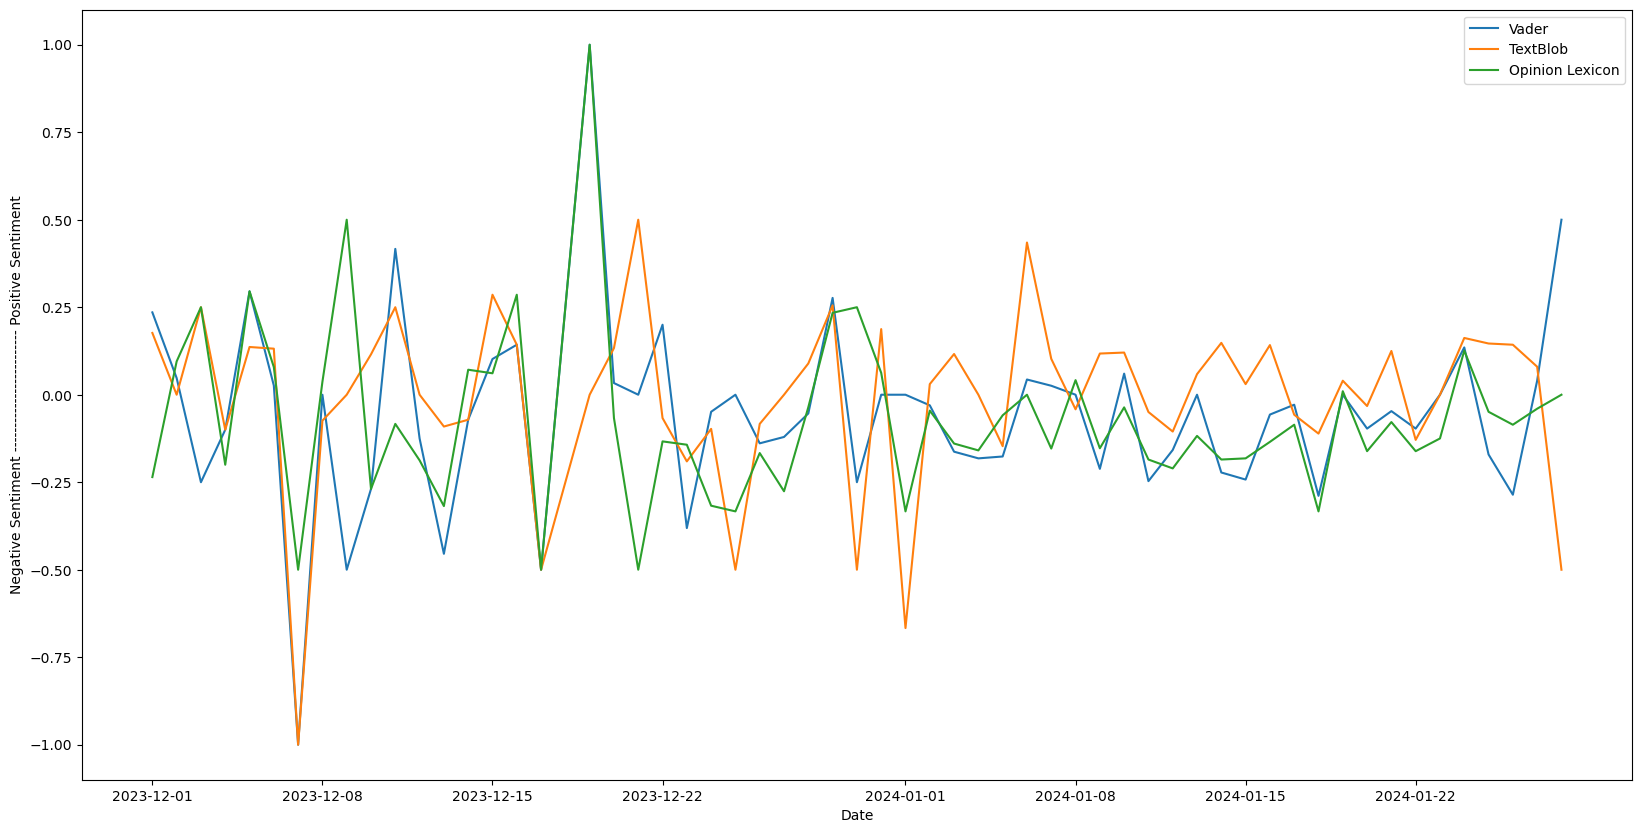

In [71]:
#grouping all the sentiments by date 
vader_over_time = SentimentOverTime.groupby('ReplyCreationTime')['Vader'].mean()
textblob_over_time = SentimentOverTime.groupby('ReplyCreationTime')['TextBlob'].mean()
lexicon_over_time = SentimentOverTime.groupby('ReplyCreationTime')['Opinion Lexicon'].mean()
# Plotting all the sentiments together over time
plt.figure(figsize=(20, 10))
vader_over_time.plot()
textblob_over_time.plot()
lexicon_over_time.plot()
plt.xlabel('Date')
plt.ylabel('Negative Sentiment ------------------------- Positive Sentiment')
plt.legend()
plt.show()

#### We can see from the plot above that there was a lot of negative sentimets amongst the replies near 12/08/23. Upon checking the data manually, I came across a post where some republicans who claimed to be presidential electors in 2020 and submitted certificates to Congress falsely asserting that former president Donald Trump had won the election in their state were charged by the nevada grand jury and people were not happy about it and that was visible in their replies where they were using a lot of angry or swear words, which explains the downfall in the sentiments of replies at that time.

#### Also, near 12/20/23, there was a surge in the positive sentiments. Upon checking the data manually, there was a post : 'In a historic decision Tuesday, the Colorado Supreme Court barred Donald Trump from running in the state’s presidential primary after determining that he had engaged in insurrection on Jan. 6, 2021.' and the replies from users seems to be very positive where users used phases like 'love it' or 'best news of the day'. This explains the surge in positive sentimets for that day.

#### The rest of the plot seems not so polar as the polarity of sentiments were not so high and low as the above two days.

### Bonus Question

**i) Pick an online site where you are eager to try out web-scraping skills to fetch data. Fetch at least 10 web pages and associated text data using the BeautifulSoup Python package for scraping**

**I'm taking amazon as the online site and fetching the product title and their reviews for 15 webpages**  
**I'm taking 15 products from the makeup brand elf and will store it's title and reviews** 

In [72]:
#created a function to fetch title and reviews 
# Reference : https://realpython.com/beautiful-soup-web-scraper-python/
def scrapedata(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Product title
    title = soup.find('span', id='productTitle').get_text().strip()
    
    # Product reviews
    reviews = []
    tags = soup.find_all('div', {'data-hook': 'review'})
    for i in tags:
        review = i.find('span', {'data-hook': 'review-body'}).get_text().strip()
        reviews.append(review)
    
    return [title, reviews]

In [73]:
#making a list of 15 urls
elf_url=['https://a.co/d/cEHOUjE',
         'https://a.co/d/5V9lHVR',
         'https://a.co/d/crBAU2Y',
         'https://a.co/d/1hKANd1',
         'https://a.co/d/7RjdNkM',
         'https://a.co/d/bc6Pqkq',
         'https://a.co/d/5o9I7dg',
         'https://a.co/d/5p6FmBU',
         'https://a.co/d/9StmbFp',
         'https://a.co/d/41RY1RJ',
         'https://a.co/d/7LquOLH',
         'https://a.co/d/i4Xq0l7',
         'https://a.co/d/7q7uMEM',
         'https://a.co/d/hlyrt9M',
         'https://a.co/d/hxn7uj8']

In [74]:
#creating an empty list to store title and reviews
results = []

#running a loop to store title and reviews after scraping data from amazon
for url in elf_url:
    title, reviews = scrapedata(url)
    for i in reviews:
        results.append([title, i])

In [75]:
#storing the title and reviews in a df
edf2 = pd.DataFrame(results, columns=['Title', 'Review'])
edf2.head()

,Title,Review
0,"e.l.f. Power Grip Primer + 4% Niacinamide, Gel-Based & Hydrating Face Primer, Evens Skin & Brightens, Grips Makeup, Vegan & Cruelty-Free, 0.811 Fl Oz","I have oily/combo skin and I really struggled to find the right primer for me. I combine this with the elf camo cc cream and it's perfect. it creates such a great, natural looking base for the rest of my makeup that lasts the whole day. definitely a holy grail product imo\nRead more"
1,"e.l.f. Power Grip Primer + 4% Niacinamide, Gel-Based & Hydrating Face Primer, Evens Skin & Brightens, Grips Makeup, Vegan & Cruelty-Free, 0.811 Fl Oz","I use this as well as some other primers .This one really seems to really help with redness . I love the extra ingredient for my skin. This is very easy to use and keeps thrvmake up on all day. I even put a dab behind my ear and spray perfume, and it seems to last a little longer. Definitely worth the price and works fabulously.\nRead more"
2,"e.l.f. Power Grip Primer + 4% Niacinamide, Gel-Based & Hydrating Face Primer, Evens Skin & Brightens, Grips Makeup, Vegan & Cruelty-Free, 0.811 Fl Oz",No se siente pegajoso al utilizarlo. Realmente cumple con sus características el maquillaje se pega a la cara para durar más y no se siente para nada pesado. Disimula muy bien los poros. Cuando se acabe es el que compraré nuevamente.\nRead more
3,"e.l.f. Power Grip Primer + 4% Niacinamide, Gel-Based & Hydrating Face Primer, Evens Skin & Brightens, Grips Makeup, Vegan & Cruelty-Free, 0.811 Fl Oz","First I will say that this primer does keep your makeup on. It's sticky at first and not that easy to spread so you have to be quick. But, I am an older female and didn't find the product the right one for my face. It made my face shiny and puffy - maybe that last was sensitivity. I thought I would appreciate the pink and the glow but that glow on me was really just too shiny. It also caused foundation to settle into lines more than usual. So, it didn't do what it should for a face my age. That said, I think this product is probably good for someone younger if you can get past the initial sticky feeling. I also had no trouble returning,so I am giving this 4 stars based on the qualifications I mentioned. I do like Elf products so I will return to the Elf primer I was using before (Skin Suntouchable - which goes on very smooth and holds my makeup just fine).\nRead more"
4,"e.l.f. Power Grip Primer + 4% Niacinamide, Gel-Based & Hydrating Face Primer, Evens Skin & Brightens, Grips Makeup, Vegan & Cruelty-Free, 0.811 Fl Oz",I have never purchased ELF cosmetics but I had seen a lot of reviews about the face primer. It's very affordable and it does the job. It feels like a glue but not sticky like glue. The moisture is very well balanced and I have combination skin. I have tried other expensive primers that make me oily or too dry. The foundation does last better with the primer worn without feeling heavy.\nRead more


In [76]:
#saving the data to a csv file
edf2.to_csv('elfdata.csv', index=False)

**ii) Clean the collected data and conduct sentiment analysis to show the polarity of each of these 10 scraped data points.**

In [77]:
#reusing the code from the 2nd question to clean the data
#removed punct, numbers and stopwords and made everything lowercase
edf2.Review = edf2.Review.replace('[^\w\s+]', '', regex=True)
edf2.Title = edf2.Title.replace('[^\w\s+]', '', regex=True)
edf2.Review = edf2.Review.replace('\d', '', regex=True)
edf2.Title = edf2.Title.replace('\d', '', regex=True)
edf2.Review = edf2.Review.str.lower()
edf2.Title = edf2.Title.str.lower()
edf2["Review"] = edf2["Review"].apply(remove_stops)
edf2["Title"] = edf2["Title"].apply(remove_stops)

In [78]:
#checking sample
edf2.sample(3)

,Title,Review
179,elf cosmetics brow lift clear eyebrow shaping wax holding brows place creates fluffy feathered look,turned brows seemed lay flat saw tutorial lift brows instant facelift works used clear mascara gels never lasted throughout day love flake use lash brush products makes brows look much fuller budget friendly price nothing lose buy read
65,elf hydrating camo concealer lightweight full coverage long lasting conceals corrects covers hydrates highlights light sand satin finish shades allday wear fl oz,elf hydrating camo concealer gamechanger makeup routine combines best worlds lightweight feel full coverage pleasantly surprised well concealer performedfirstly lightweight formula dream apply blends seamlessly doesnt feel heavy cakey skin despite weightlessness manages provide impressive coverage effectively concealing imperfections dark circles blemishesthe hydrating aspect standout feature concealer doesnt dry skin settle fine lines instead keeps undereye area looking fresh hydrated throughout day huge win methe shade range extensive making easy find perfect match skin tone plus doefoot applicator allows precise application target specific areas easeive used many concealers past elfs hydrating camo concealer quickly become one favorites fantastic product delivers promises offering natural look impressive coverage highly recommend anyone looking reliable concealer wont break bank read
135,elf clear lash brow mascara pack conditioning clear brow lash gel grooming defining separating longlasting vegan crueltyfree,ive using eyebrow gel years leave white flakes hold lasts day however use eyelash gel feel could harsh eyelashes end using sides eyebrows havent disappointed lets forget affordable read


In [79]:
#reusing the vader sentiment analysis function we created before to do sentiment analysis
edf2['Vader'] = edf2['Review'].apply(vader_score)

In [80]:
#checking a sample
edf2.sample(3)

,Title,Review,Vader
176,elf cosmetics brow lift clear eyebrow shaping wax holding brows place creates fluffy feathered look,adore product exactly says brows thin super thick either love feathered brow look using spoolie brush along gets job done stays put hours definitely going repurchase think considering buying expensive product supposed thing definitely try one first read,1
147,elf halo glow contour beauty wand liquid contour wand naturally sculpted look buildable formula vegan crueltyfree deeprich,contour amazing glow like highlighter much definitely buy read,1
17,elf glow reviver lip oil nourishing tinted lip oil highshine finish infused jojoba oil vegan crueltyfree pink quartz,lip oil lovely right amount pigment shine feels substantial thick applicator perfect size shape bought love shades read,1


In [81]:
#checking the value counts of positive and negative reviews
edf2['Vader'].value_counts() 

Vader
1    182
0      3
Name: count, dtype: int64

### We can see from above that people usually give positive feedback to elf products since it is a top selling brand which sells quality products for low prices and people are generally happy with the brand

References:
- https://www.geeksforgeeks.org/remove-urls-from-string-in-python/
- https://www.geeksforgeeks.org/python-remove-punctuation-from-string
- https://www.geeksforgeeks.org/python-ways-to-remove-numeric-digits-from-given-string/
- https://www.geeksforgeeks.org/pandas-dataframe-iterrows/
- https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
- https://realpython.com/beautiful-soup-web-scraper-python/